In [8]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix


(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [3]:
keras.backend.backend()

'tensorflow'

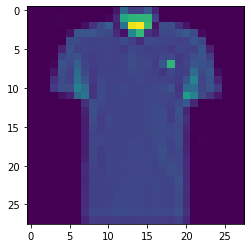

0


In [2]:
plt.imshow(train_imagesi[202,:,:])
plt.show()
print(train_labels[202])

In [6]:
train_images[202,150:160]

array([-0.5984252 , -0.62204724, -0.64566929, -0.56692913, -0.59055118,
       -0.62992126, -0.61417323, -0.61417323, -0.66929134, -0.58267717])

**Создание модели**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential

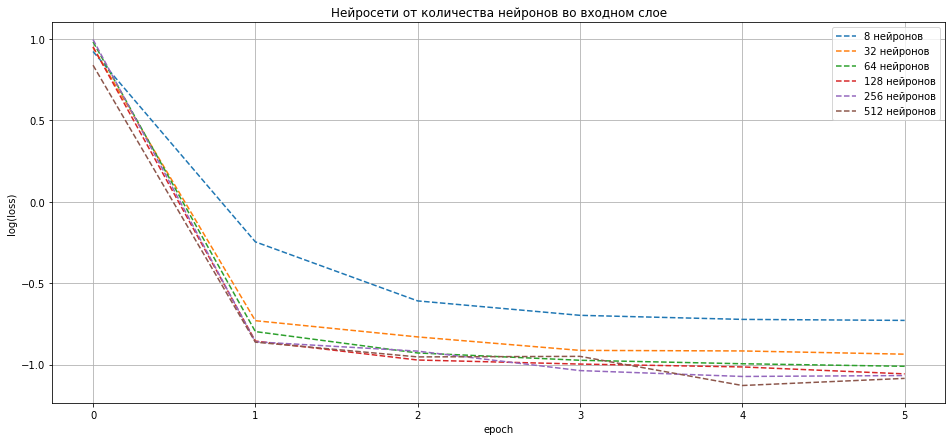

In [3]:
plt.figure(figsize=(16,7))

epochs = 5

epoch = np.arange(epochs+1)

for n in [8, 32, 64, 128, 256, 512]:
    modeli = Sequential([
                      Dense(n, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])

    modeli.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    print(modeli.summary())
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
    hh = modeli.fit(
    train_images,
    to_categorical(train_labels),
    epochs=epochs,
    batch_size=128, validation_split=0.2, verbose = 0
    )
  # картинки
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(n) +' нейронов')

plt.legend()
plt.grid('On')

plt.title('Нейросети от количества нейронов во входном слое')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Как видно из графика, после 64 нейронов ответ не сильно отличается от их количества.

Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…

Функции потерь:
* CategoricalCrossentropy()
* SparseCategoricalCrossentropy()
* BinaryCrossentropy()
* MeanSquaredError()
* KLDivergence()
* CosineSimilarity()
…

Метрики:
* CategoricalAccuracy()
* SparseCategoricalAccuracy()
* BinaryAccuracy()
* AUC()
* Precision()
* Recall()
…

In [10]:
# 4 слоя
model1 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'),
  Dense(100, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)


model1.fit(  
  train_images[:,:],
  y_t[:,:],
  epochs=15,
  batch_size=64, validation_split=0.2
)

# Evaluate the model.
model1.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9, 2, 1, 1, 6]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9, 2, 1, 1, 6]

Epoch 1/15
750/750 [==============================] - 3s 3ms/step - loss: 0.6507 - accuracy: 0.7716 - val_loss: 0.4239 - val_accuracy: 0.8446
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3900 - accuracy: 0.8576 - val_loss: 0.4220 - val_accuracy: 0.8443
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3497 - accuracy: 0.8714 - val_loss: 0.3868 - val_accuracy: 0.8604
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3236 - accuracy: 0.8810 - val_loss: 0.3867 - val_accuracy: 0.8613
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8850 - val_loss: 0.3860 - val_accuracy: 0.8611
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 0.2940 - accuracy: 0.8910 - val_loss: 0.3614 - val_accuracy: 0.8762
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.2816 - accuracy: 0.8965 - val_loss: 0.3535 - val_accuracy: 0.8750
Epoch 

In [11]:
# 6 слоев
model2 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(50, activation='tanh'),
  Dense(50, activation='tanh'),
  Dense(60, activation='tanh'),
  Dense(60, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)


model2.fit(  
  train_images[:,:],
  y_t[:,:],
  epochs=15,
  batch_size=64, validation_split=0.2
)

# Evaluate the model.
model2.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model2.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9, 2, 1, 1, 6]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9, 2, 1, 1, 6]

Epoch 1/15
750/750 [==============================] - 3s 4ms/step - loss: 0.7253 - accuracy: 0.7480 - val_loss: 0.4426 - val_accuracy: 0.8418
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 0.4022 - accuracy: 0.8529 - val_loss: 0.3883 - val_accuracy: 0.8584
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3646 - accuracy: 0.8675 - val_loss: 0.3686 - val_accuracy: 0.8680
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3395 - accuracy: 0.8757 - val_loss: 0.3855 - val_accuracy: 0.8637
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3243 - accuracy: 0.8839 - val_loss: 0.3655 - val_accuracy: 0.8648
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3144 - accuracy: 0.8840 - val_loss: 0.3587 - val_accuracy: 0.8732
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3013 - accuracy: 0.8899 - val_loss: 0.3500 - val_accuracy: 0.8760
Epoch 

In [12]:
# 10 слоев
model3 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(30, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)


model3.fit(  
  train_images[:,:],
  y_t[:,:],
  epochs=15,
  batch_size=64, validation_split=0.2
)

# Evaluate the model.
model3.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model3.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9, 2, 1, 1, 6]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9, 2, 1, 1, 6]

Epoch 1/15
750/750 [==============================] - 4s 4ms/step - loss: 0.9107 - accuracy: 0.7174 - val_loss: 0.4609 - val_accuracy: 0.8411
Epoch 2/15
750/750 [==============================] - 3s 3ms/step - loss: 0.4423 - accuracy: 0.8436 - val_loss: 0.4383 - val_accuracy: 0.8443
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3929 - accuracy: 0.8592 - val_loss: 0.4060 - val_accuracy: 0.8552
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3662 - accuracy: 0.8688 - val_loss: 0.4099 - val_accuracy: 0.8568
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3548 - accuracy: 0.8744 - val_loss: 0.3912 - val_accuracy: 0.8629
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.3396 - accuracy: 0.8784 - val_loss: 0.3773 - val_accuracy: 0.8651
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3222 - accuracy: 0.8822 - val_loss: 0.3558 - val_accuracy: 0.8749
Epoch 

Как видно из трех моделей, при углублении графа модели, качество предсказаний падает - в этом случае это связано с тем, что для такой простой задачи не нужно выбирать настолько объемные нейронные сети.

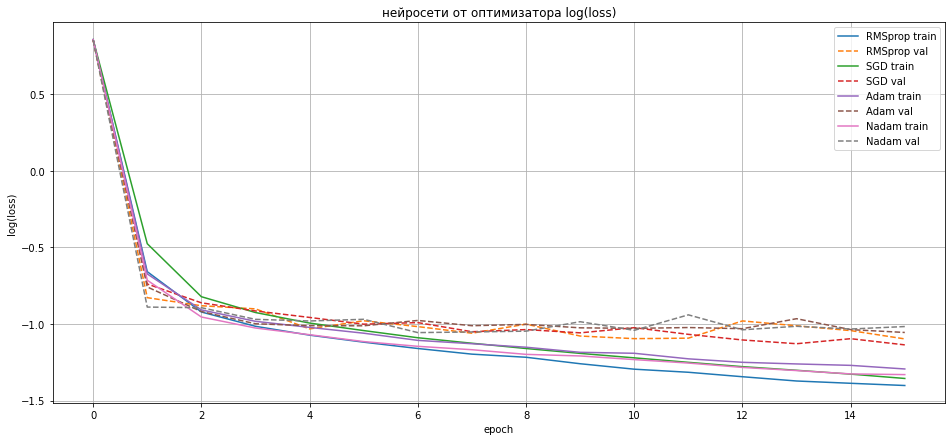

In [14]:
# создаем модель model
model = Sequential([
                    Dense(128, activation='tanh', input_shape=(784,)),
                    Dense(110, activation='tanh'),
                    Dense(100, activation='tanh'),
                    Dense(10, activation='softmax'),
                    ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                    Dense(128, activation='tanh', input_shape=(784,)),
                    Dense(110, activation='tanh'),
                    Dense(100, activation='tanh'),
                    Dense(10, activation='softmax'),
                    ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


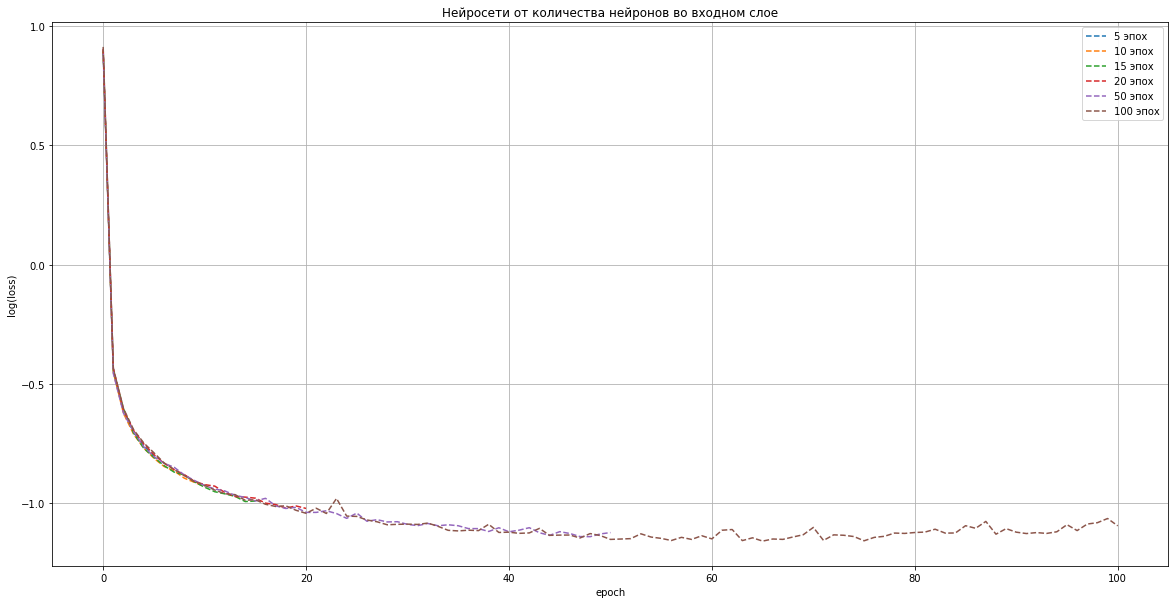

In [21]:
plt.figure(figsize=(20,10))

for ep in [5, 10, 15, 20, 50, 100]:
    modeli = Sequential([
                    Dense(128, activation='tanh', input_shape=(784,)),
                    Dense(110, activation='tanh'),
                    Dense(100, activation='tanh'),
                    Dense(10, activation='softmax'),
                    ])

    modeli.compile(
      optimizer='SGD',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
    hh = modeli.fit(
    train_images,
    to_categorical(train_labels),
    epochs=ep,
    batch_size=128, validation_split=0.2, verbose = 0
    )
  # картинки
    plt.plot(np.arange(ep+1),np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(ep) +' эпох')

plt.legend()
plt.grid('On')

plt.title('Точность нейросети от количества эпох')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [42]:
model = Sequential([
                    Dense(128, activation='tanh', input_shape=(784,)),
                    Dense(110, activation='tanh'),
                    Dense(100, activation='tanh'),
                    Dense(10, activation='softmax'),
                    ])

# Compile the model.
model.compile(
  optimizer='SGD',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)


model.fit(  
  train_images[:,:],
  y_t[:,:],
  epochs=30,
  batch_size=128, validation_split=0.2
)

# Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9, 2, 1, 1, 6]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9, 2, 1, 1, 6]

y_pred = model.predict(test_images[:,:])
y_pred_class = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_pred_class, test_labels))

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 1.2538 - accuracy: 0.6179 - val_loss: 0.6258 - val_accuracy: 0.7896
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5915 - accuracy: 0.8010 - val_loss: 0.5297 - val_accuracy: 0.8170
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.8238 - val_loss: 0.4866 - val_accuracy: 0.8283
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4720 - accuracy: 0.8364 - val_loss: 0.4618 - val_accuracy: 0.8367
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4499 - accuracy: 0.8419 - val_loss: 0.4450 - val_accuracy: 0.8385
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.8461 - val_loss: 0.4337 - val_accuracy: 0.8444
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8537 - val_loss: 0.4176 - val_accuracy: 0.8487
Epoch 

In [43]:
target_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
print(classification_report(y_pred_class, test_labels, target_names=target_names))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82      1050
           2       0.96      0.98      0.97       978
           3       0.82      0.76      0.79      1082
           4       0.89      0.85      0.87      1037
           5       0.77      0.81      0.79       946
           6       0.94      0.95      0.94       987
           7       0.64      0.71      0.67       891
           8       0.94      0.92      0.93      1015
           9       0.96      0.95      0.96      1008
           0       0.95      0.95      0.95      1006

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



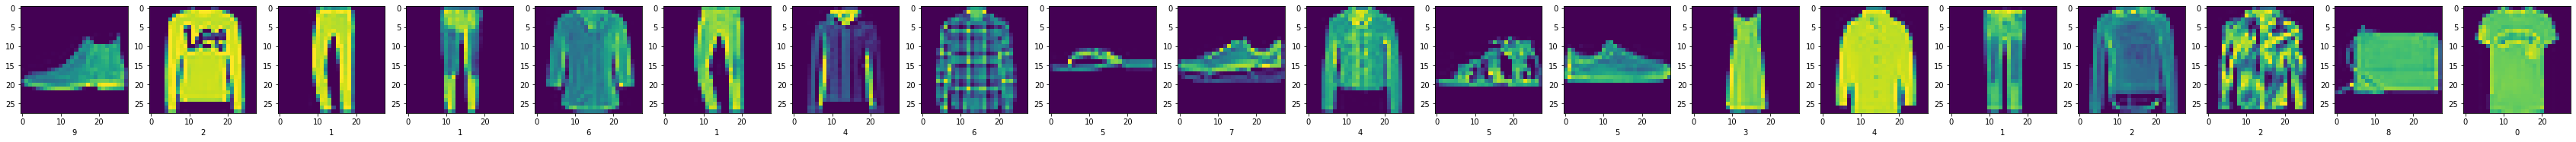

In [45]:
N = 20
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

## Вывод: 
Для данного датасета показала себя лучше всего четырехслойная модель с оптимизатором SGD, количество эпох = 30. По матрице ошибок можно заметить, что хуже всего распознается 7 и 5 класс. Как можно заметить - это обувь (то есть, примерно похожие объекты).